# Módulo 5: Redes Neuronales - Parte I

## Reconocimiento de digitos en imágenes

En esta actividad vamos a aprender a desarrollar nuestra propia red neuronal para reconocimiento dígitos en imagenes.

Para ello, vamos a trabajar con un dataset (digits.csv) que contiene imagenes en escala de grises de **28x28 pixeles** (un total de 784 pixeles). **Cada imagen representa un digito (desde el 0 al 9) escrito a mano**. Cada pixel tiene un valor asociado entre 0 y 255 que indica la luminosidad u oscuridad de dicho pixel (valores mas grandes indican mayor oscuridad).

El dataset tiene 785 columnas, en donde la primera columna es el label del dataset y las columnas restantes son los features que indican los valores de cada pixel de la imagen.

### Clasificación binaria: ¿Es un 2?
La idea es utilizar este dataset para reconocer dígitos que fueron escritos manualmente utilizando una red neuronal simple. 

En este caso, vamos a reconocer únicamente aquellas imágenes que representen el número 2. Es decir, la idea es hacer una **clasificación binaria** en donde, dada una imagen de un dígito se determine si corresponde con el número 2 o no.

En primer lugar, cargamos en memoria el dataset (en un pandas DataFrame), analizamos los labels y observamos algunas imágenes.


### <font color='red'>**Actividad 1:**</font>
**a)** Escribir en Python un programa para dividir el dataset del archivo digits.csv almacenando los features en una variable llamada **X**  y los labels en una variable llamada **y**.

-> Suponiendo que el digits.csv contiene como primer columna el valor del label y el resto el valor individual de cada pixel

In [112]:
import pandas as pd

df = pd.read_csv("digits.csv")

y = df.iloc[:,0] #primera columna
X = df.iloc[:, 1:] #todas menos la 1ra

print("valores de features:")
X


valores de features:


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,165,25,77,72,9,148,115,208,243,197,...,65,192,197,88,34,207,3,188,238,165
1,171,211,88,70,148,134,28,115,134,66,...,94,215,29,102,123,158,203,194,221,60
2,135,179,244,73,215,192,240,145,168,243,...,241,106,223,103,11,56,245,191,142,32
3,193,121,117,65,36,250,25,204,72,50,...,68,123,39,127,207,13,163,230,123,139
4,103,75,240,54,164,82,203,179,162,186,...,62,62,241,251,78,106,158,91,51,4
5,196,134,233,41,3,167,236,100,155,141,...,180,171,193,134,28,133,232,74,135,29
6,100,82,47,188,63,123,194,41,29,96,...,116,3,161,171,89,1,98,184,49,103
7,40,82,41,54,213,175,92,127,193,41,...,43,205,228,225,204,16,57,5,225,123
8,223,8,33,54,64,160,223,2,234,155,...,197,37,150,161,18,128,31,236,30,173
9,130,149,18,80,99,255,12,72,124,218,...,58,155,156,86,68,195,24,231,154,250


In [113]:
print("valores de labels:")
y

valores de labels:


0     5
1     0
2     3
3     3
4     7
5     9
6     3
7     5
8     2
9     2
10    2
11    6
12    8
13    8
14    1
15    6
16    2
17    7
18    8
19    1
Name: label, dtype: int64

**b)** Observar la cantidad de ejemplos por cada label, analizando la variable **y**.

In [114]:
# shape nos tira la dimension del array en una tupla como (nro_filas, nro_columnas). Tomamos el primer valor
cant = y.shape[0]
print(f"Cantidad de ejemplos: {cant}")

Cantidad de ejemplos: 20


### Visualización de imágenes del dataset
Las imagenes (28px x 28px) fueron cargadas en memoria en un pandas Dataframe que representa un vector de una única dimensión (1D) con 784 valores, cada una representada por un pandas Series. Para imprimir y visualizar, como así tambien para crear una red neuronal que las lea debemos reformatear esta estructura y convertirla en una matriz (array) de 3 dimensiones (3D) de 28x28x1. Para ello utilizamos el metodo .reshape():

X = X.values.reshape(-1,28,28,1)

**Aclaración:** el primer parámetro de reshape, que se encuentra en -1, toma por defecto la dimensión del array (formado por X.values que contiene todos los valores del DataFrame en un array de 2 dimensiones). (Ver [documentación](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html#numpy-reshape) para más info) 

Tensorflow y Keras requieren una dimensión extra al final que se corresponde con los canales de colores. En este caso, las imagenes del dataset se encuentran en la escala de grises con lo cual utilizaremos un único canal (para imagenes RGB se usan 3 canales).

In [115]:
#ya habia hecho .values antes entonces no necesito hacerlo de vuelta
X = X.values.reshape(-1,28,28,1)

A continuación observemos dos imágenes distintas y sus labels.

LABEL: 5


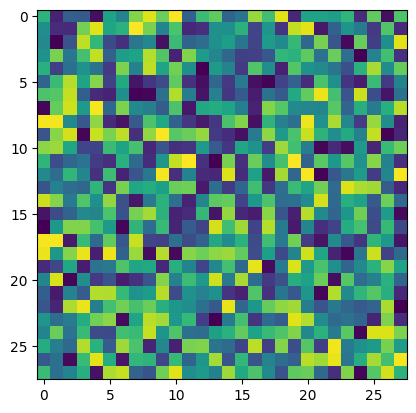

In [116]:
import matplotlib.pyplot as plt

g1 = plt.imshow(X[0][:,:,0])
print("LABEL:", y[0])

#a los digitos los cree aleatoriamente entonces no se parece un dos aunque el label lo diga

LABEL: 0


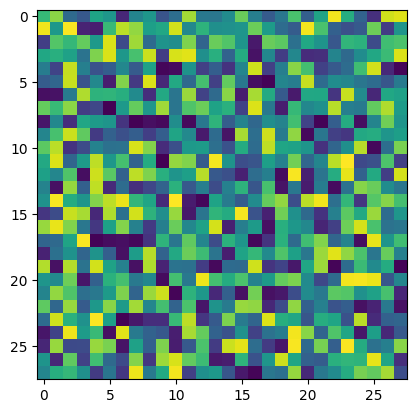

In [117]:
plt.imshow(X[1][:,:,0])
print("LABEL:", y[1])

### Redefinición de los Labels
Como lo que queremos hacer es un clasificador binario que unicamente detecte imagenes con el valor 2, tenemos que modificar los labels para tener unicamente dos valores y=1, cuando la imagen representa un 2 e y=0, cuando la imagen representa cualquier otro digito.

Para ello hacemos uso del potencial de pandas, que nos permite modificar valores de columnas facilmente utilizando condiciones y filtros. Por ejemplo, si quisieramos cambiar el valor de todos los labels que se corresponden con el digito 9 por un valor igual a -1, podemos hacer:

**y.loc[y == 9] = -1**

Esta linea de codigo buscaria en la variable **y** (que es una pandas Series) todas aquellas filas que contienen el valor 9 y los reemplazaria con un valor igual a -1.

De esta misma forma, podremos modificar nuestro dataset para que contenga dos valores y=1, para todos los labels igual a 2 e y=0 para todos los labels distintos de 2.

### <font color='red'>**Actividad 2:**</font>
**a)** Modificar los valores de **y** para que sólo contenga los labels y=1 e y=0.


In [118]:
y

0     5
1     0
2     3
3     3
4     7
5     9
6     3
7     5
8     2
9     2
10    2
11    6
12    8
13    8
14    1
15    6
16    2
17    7
18    8
19    1
Name: label, dtype: int64

In [119]:
y.loc[y!=2] = 0
y.loc[y!=0] = 1 #todo lo que no quedo en 0 lo transformo en 2
y

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    1
17    0
18    0
19    0
Name: label, dtype: int64

### Importante: no correr la celda anterior mas de una vez sino todos los datos se convierten en 0

**b)** Observar la **cantidad de ejemplos por cada label**, analizando la variable **y**.

In [120]:
cant = y.value_counts()
print(f"Cantidad de ejemplos: {cant}")

Cantidad de ejemplos: label
0    16
1     4
Name: count, dtype: int64


Como vimos anteriormente, para los algoritmos de ML en general suele ser mejor normalizar los datos para que el proceso de aprendizaje sea más efectivo y eficiente.

Para ello normalizamos dividiendo por 255 todos los valores de pixeles que se encuentran en la variable X

In [121]:
X = X / 255.0

En este punto tenemos unicamente dos labels: 
- **0**, para aquellas imágenes que no representan el dígito 2
- **1**, para las imágenes que representan el dígito 2.

### Creación del modelo con Tensorflow y Keras

A continuación vamos a definir el modelo de red neuronal para realizar clasificación binaria. Para ello, veamos como es posible crear redes neuronales utilizando el framework Tensorflow.

Lo primero que tenemos que hacer es importar el modulo de tensorflow

In [122]:
import tensorflow as tf

# Imprimimos la version de tensorflow
tf.__version__

'2.20.0'

Antes de crear y entrenar nuestro modelo de red neuronal, es necesario dividir el dataset en un conjunto de entrenamiento y otro de testeo. Esto nos permitirá entrenar el modelo con una parte de los datos y luego evaluar su desempeño con información que no ha visto previamente.

### <font color='red'>**Actividad 3:**</font>
**a)** Dividir los datos dejando el 80% para entrenamiento y el 20% para testeo. Para ello usamos las variables *X* e *y* creadas anteriormente. Usar las variables **X_train, X_test, y_train, y_test** para almacenar los distintos datasets.

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
    #random state es una semilla de randoms (reproducible en futuras ocasiones)
    #stratify mantiene la proporcion de clases de entrenamiento y test
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (16, 28, 28, 1)
X_test: (4, 28, 28, 1)
y_train: (16,)
y_test: (4,)


En particular vamos a utilizar Keras (tf.keras), que es la API de alto nivel de TensorFlow para construir y entrenar modelos de aprendizaje profundo. 

Keras provee una serie de clases que nos permiten construir fácilmente redes neuronales en una pocas líneas de código. Veamos algunas de ellas:

[Sequential](https://keras.io/api/models/sequential/): Esta clase define una secuencia de layers en la red neuronal. Suele utilizarse como contenedor de toda la red y sus layers internas.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): En general las imágenes estan representadas por una matriz de píxeles (en este ejemplo, de 28x28). La clase Flatten simplemente toma esa matriz y la convierte en una matriz unidimensional (1D).

[Dense](https://keras.io/api/layers/core_layers/dense/): La clase Dense define la layer más simple de redes neuronales en donde todas las neuronas se conectan con todas las entradas y todas las salidas.

Recordemos que cada layer de neuronas necesita una [función de activación](https://keras.io/api/layers/activations/) para decirles qué hacer. Hay muchas opciones, pero por ahora solo usaremos la funcion sigmoidea (**'sigmoid'**).
 
Teniendo este conocimiento básico de Keras, la construcción del modelo se define de la siguiente manera:

 
**model = tf.keras.models.Sequential()**

**model.add(layer_1)**

**...**

**model.add(layer_n)**



En general, si se trata de imágenes, la primera layer del modelo es de la clase Flatten. Las siguientes layers suelen ser del tipo Dense, con diferentes cantidades de neuronas. 

Recordemos que, como en nuestro caso estamos realizando un clasificador binario, necesitamos que la última layer tenga una única neurona.

Ahora que sabemos como construir una red neuronal simple con Keras vamos a definir un modelo para nuestro problema.


### <font color='red'>**Actividad 4:**</font>
**a)** Crear un **modelo de red neuronal con Keras**, usando la clase Sequential. Luego, agregarle **3 layers** distintas: una layer para convertir las imágenes en una matriz 1D, una layer densa con 128 neuronas y una layer de salida también densa con una única neurona.
 

In [134]:
#Creamos el modelo
modelo = tf.keras.Sequential()

#primera capa flatten que convierte la imagen a un vector 1D
modelo.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))

#layer dense (todas las neuronas de entradas se conectan con todas las de salida) con 64 neuronas
modelo.add(tf.keras.layers.Dense(64, activation="sigmoid")) 
#leyendo en documentacion vimos que no es tan recomendable usar funcion sigmoidea de activacion en capas ocultas
#pero en la consigna especifica que sea de esa forma

#layer de salida -> clasificador binario por eso tiene una neurona
modelo.add(tf.keras.layers.Dense(1, activation="sigmoid"))

#muestra un cuadrito visual
modelo.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,305 (196.50 KB)

 Trainable params: 50,305 (196.50 KB)

 Non-trainable params: 0 (0.00 B)

**b)** Compilar el modelo utilizando el método [.compile()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile). La función de costo que vamos a utilizar es **binary_crossentropy** y como métrica sólo **accuracy**.

In [135]:
modelo.compile(
    optimizer='adam', # este algoritmo ajusta automaticamente los pesos de la red
    loss='binary_crossentropy', # funcion de perdida -> para clasificacion binaria mide la probabilidad de ser 0 o 1
    metrics=['accuracy'] #monitorear el % de predicciones correctas
)

**c)** Entrenar el modelo utilizando el método [.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit), con el dataset de entrenamiento. Setear la cantidad de epochs a 5. 

**Aclaración:** La cantidad de **epochs** se refiere al paso completo de datos de los entrenamiento a través del modelo. En este ejemplo con 5 pasadas es suficiente.

In [138]:
historial = modelo.fit(
    X_train, #features
    y_train, #labels
    epochs=5,     #cantidad de pasadas
)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8125 - loss: 0.5244
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8125 - loss: 0.5058
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8125 - loss: 0.4834
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8125 - loss: 0.4586
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8125 - loss: 0.4331


historial almacena informacion sobre el entrenamiento

## Evaluación del modelo
En este punto, ya tenemos nuestra red neuronal entrenada con los datos de entrenamiento. Ahora queremos evaluar si el modelo aprendió de forma adecuada. Para ello, primero analizaremos su rendimiento sobre los mismos datos con los que fue entrenada y luego observaremos cómo se comporta frente a datos nuevos, es decir, el conjunto de testeo.

### Evaluación del modelo con los datos de entrenamiento
Primero vamos a evaluar el modelo utilizando los mismos datos con los que fue entrenado (**X_train**). Le mostraremos las características (features) sin las etiquetas reales (labels), para que las prediga, y así podamos observar cómo se desempeña sobre el conjunto de entrenamiento.
### <font color='red'>**Actividad 5:**</font>

**a)** Generar **predicciones** para el dataset de entrenamiento (**X_train**), utilizando el metodo [.predict()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict) y almacenar el resultado en una variable llamada **y_pred**.


In [140]:
y_pred = modelo.predict(X_train)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[0.10957176],
       [0.1355011 ],
       [0.10346267],
       [0.10189847],
       [0.11881021],
       [0.09776733],
       [0.10296161],
       [0.10625075],
       [0.1912419 ],
       [0.11173767],
       [0.10237992],
       [0.19145031],
       [0.1122005 ],
       [0.08952007],
       [0.17332573],
       [0.1096918 ]], dtype=float32)

Ahora que tenemos todas las predicciones del dataset de entrenamiento vamos a imprimir las 10 primeras y compararlas con el label real.

**Aclaración:** Recordemos que  el método .predict() devuelve la probabilidad de que pertenezca a la clase positiva. En este ejemplo, sera la probabilidad de que la imagen sea efectivamente un 2.

In [141]:
y_pred = y_pred.flatten()

resultado = pd.DataFrame({
    'Real': y_train,
    'Probabilidad': y_pred,
    'Predicción': (y_pred > 0.5).astype(int)
})
print(resultado.head(10))


    Real  Probabilidad  Predicción
13     0      0.109572           0
12     0      0.135501           0
11     0      0.103463           0
5      0      0.101898           0
2      0      0.118810           0
19     0      0.097767           0
18     0      0.102962           0
4      0      0.106251           0
10     1      0.191242           0
0      0      0.111738           0


**b)** Evaluar el modelo en el dataset de entrenamiento utilizando el método [.evaluate()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate), el cual nos va a decir que tan preciso es el modelo al momento de predecir los labels de los mismos ejemplos con los que fue entrenado.

**Aclaración:** Observar que el metodo .evaluate devuelve un vector con dos valores: el error y el accuracy.

In [144]:
resultado = modelo.evaluate(X_train, y_train)
print("Error: ", resultado[0])
print("Accuracy: ", resultado[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8125 - loss: 0.4090
Error:  0.4090062081813812
Accuracy:  0.8125


En este caso me dio el accuracy 0.8125 lo que significa que logra acertar 81% aprox


### Evaluación del modelo con los datos de testeo
Ahora vamos a evaluar el modelo utilizando datos que no fueron vistos durante el entrenamiento. Para ello, usaremos el conjunto de testeo (X_test). Le proporcionaremos al modelo únicamente las características (features), sin las etiquetas reales (labels), para que las prediga y así podamos analizar su desempeño sobre datos desconocidos.

### <font color='red'>**Actividad 6:**</font>
**a)** Generar **predicciones** para el dataset de testeo (**X_test**), utilizando el metodo [.predict()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict) y almacenar el resultado en una variable llamada **y_pred**.

In [145]:
# almacenamos la prediccion para el ds de prueba en y_pred
y_pred = modelo.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Ahora que tenemos todas las predicciones del dataset de testeo vamos a imprimir las 10 primeras y compararlas con el label real.

In [146]:
y_pred = y_pred.flatten()

resultado = pd.DataFrame({
    'Real': y_test,
    'Probabilidad': y_pred,
    'Predicción': (y_pred > 0.5).astype(int)
})
print(resultado.head(10))

    Real  Probabilidad  Predicción
15     0      0.116654           0
8      1      0.114786           0
6      0      0.115347           0
3      0      0.101258           0


**b)** Evaluar el modelo en el dataset de testeo utilizando el método [.evaluate()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate), el cual nos va a decir que tan preciso es el modelo al momento de predecir los labels de ejemplos desconocidos.

**Aclaración:** Observar que el metodo .evaluate devuelve un vector con dos valores: el error y el accuracy.

In [ ]:
resultado = modelo.evaluate(X_test, y_test)

## Observaciones finales

Si todo va bien, en este punro el modelo muestra un muy buen desempeño tanto en el conjunto de entrenamiento como en el de testeo.
- **Entrenamiento**: error = 0.036, accuracy ≈ 98.98%
- **Testeo**: error = 0.042, accuracy ≈ 98.83%

La pequeña diferencia entre ambas métricas sugiere que el modelo generaliza bien y no presenta **overfitting** evidente.

Sin embargo, el dataset está **fuertemente desbalanceado** (clase 0: **37823 ejemplos**, clase 1: **solo 4177**).
Esto implica que **la métrica de accuracy puede dar una falsa sensación de buen rendimiento**, ya que el modelo podría acertar mayormente por predecir la clase mayoritaria. Para una evaluación más realista, sería recomendable complementar el análisis con métricas como:
- **Precision, recall y F1-score**, especialmente para la clase minoritaria.
- **Matriz de confusión**, para visualizar los verdaderos positivos y falsos negativos.

Además se podría tratar de balancear el dataset para tener más o menos la misma cantidad de ejemplo de la clase positiva como de la negativa.